[< back](https://www.jakobsalomonsson.com/)

<br><br>

<div style="text-align: center;">
    <img src="https://storage.googleapis.com/pr-newsroom-wp/1/2018/11/Spotify_Logo_CMYK_Green.png" width="50%" center>
</div>

<br><br>

# Spotify Song Popularity


Let's learn more about what makes a song popular. My intuition is that shorter, vocal and more energetic songs are more popular among the general population. These are the kind of songs you hear most frequently when tuning into the radio or checking the top tracks of the month. Is it possible to prove this statistically? Moreover, is your music taste more in line with the general public's, or you've developed a unique taste of your own?

The dataset can be downloaded [here](https://www.kaggle.com/akiboy96/spotify-dataset) while the feature descriptions are taken from Spotify's developer [page](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features). A summary is in the table below. 

<br><br>

| **Feature**        	| **Description**                                                                                                                                                                                                                                                                                                                                                                                    	|
|--------------------	|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------	|
| `track`            	| Track name                                                                                                                                                                                                                                                                                                                                                                                         	|
| `artist`           	| Artist name                                                                                                                                                                                                                                                                                                                                                                                        	|
| `uri`              	| URI for the track                                                                                                                                                                                                                                                                                                                                                                                  	|
| `danceability`     	| Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.                                                                                                                                                       	|
| `energy`           	| Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.                                                                                                                                                                                                                                         	|
| `key`              	| The key the track is in. Integers map to pitches using standard Pitch Class notation.                                                                                                                                                                                                                                                                                                              	|
| `loudness`         	| The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks.                                                                                                                                                                                                                                   	|
| `mode`             	| Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.                                                                                                                                                                                                                                    	|
| `speechiness`      	| Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.                                                                                                                                                                                                           	|
| `acousticness`     	| A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.                                                                                                                                                                                                                                                                       	|
| `instrumentalness` 	| Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. 	|
| `liveness`         	| Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.                                                                                                                                                                                                                                                 	|
| `valence`          	| A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric).                                                                                                                                                                                                                                  	|
| `tempo`            	| The overall estimated tempo of a track in beats per minute (BPM).                                                                                                                                                                                                                                                                                                                                  	|
| `duration_ms`      	| Duration in milliseconds                                                                                                                                                                                                                                                                                                                                                                           	|
| `time_signature`   	| An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7.                                                                                                                                                                                                                  	|
| `chorus_hit`       	| This the the author's best estimate of when the chorus would start for the track. It's the timestamp of the start of the third section of the track.                                                                                                                                                                                                                                               	|
| `sections`         	| Number of sections in a songs                                                                                                                                                                                                                                                                                                                                                                      	|
| `popularity`       	| Song popularity, with popular songs (1) and unpopular songs (0)                                                                                                                                                                                                                                                                                                                                    	|
| `decade`           	| Decade                                                                                                                                                                                                                                                                                                                                                                                             	|


<br><br>

More specifically, I'm interested in finding out whether attributes such as *Danceability*, *Energy*, *Speechiness*, *Instrumentalness* and *Duration* are significantly different between popular and unpopular songs. Let's get started. 


<br><br>

> **Short summary**: There are statistically significant differences in Danceability (12-13%), Energy level (8-10%), Instrumentalness (24-25%) and Duration (15-21s) but a neglibible difference in Speechiness (<1%) between popular and unpopular songs. 

<br><br>


<a name="top"></a>

<br>

## Index


- [Initial data exploration](#exploration)
- [Danceability](#danceability)
- [Energy](#energy)
- [Speechiness](#speechiness)
- [Instrumentalness](#instrumentalness)
- [Duration](#duration)
- **[Conclusions](#conclusions)**


<br>

In [358]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy import stats

<a name="exploration"></a>

## [Initial data exploration](#top)

Load the data, decode the `mode` and `popularity` columns for ease of understanding, and delete two columns we're not interested in. Finally, display some statistics to make an initial verification that the data is okay. 

In [359]:
# Load the data into pandas. 
spotify = pd.read_csv('Spotify/spotify_dataset.csv')

# Decode mode and popularity to facilitate interpretation. Convert duration_ms to seconds
spotify['mode'] = spotify['mode'].apply(lambda x: 'Major' if x == 1 else 'Minor')
spotify['popularity'] = spotify['popularity'].apply(lambda x: 'Popular' if x == 1 else 'Unpopular')
spotify['duration'] = spotify['duration_ms'] / 1000

# Remove the uri column
spotify.drop(['uri'], axis=1, inplace=True)

# Display some statistics
display(spotify.head())
spotify.info()
display(spotify.describe())

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,popularity,decade,duration
0,Jealous Kind Of Fella,Garland Green,0.417,0.620,3,-7.727,Major,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,Popular,60s,173.533
1,Initials B.B.,Serge Gainsbourg,0.498,0.505,3,-12.475,Major,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,Unpopular,60s,213.613
2,Melody Twist,Lord Melody,0.657,0.649,5,-13.392,Major,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,Unpopular,60s,223.960
3,Mi Bomba Sonó,Celia Cruz,0.590,0.545,7,-12.058,Minor,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,Unpopular,60s,157.907
4,Uravu Solla,P. Susheela,0.515,0.765,11,-3.515,Minor,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,Unpopular,60s,245.600


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41099 entries, 0 to 41098
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41099 non-null  object 
 1   artist            41099 non-null  object 
 2   danceability      41099 non-null  float64
 3   energy            41099 non-null  float64
 4   key               41099 non-null  int64  
 5   loudness          41099 non-null  float64
 6   mode              41099 non-null  object 
 7   speechiness       41099 non-null  float64
 8   acousticness      41099 non-null  float64
 9   instrumentalness  41099 non-null  float64
 10  liveness          41099 non-null  float64
 11  valence           41099 non-null  float64
 12  tempo             41099 non-null  float64
 13  duration_ms       41099 non-null  int64  
 14  time_signature    41099 non-null  int64  
 15  chorus_hit        41099 non-null  float64
 16  sections          41099 non-null  int64 

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,duration
count,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,4.109900e+04,41099.000000,41099.000000,41099.000000,41099.000000
mean,0.539683,0.579544,5.213752,-10.221446,0.072952,0.364232,0.154403,0.201534,0.542450,119.336349,2.348755e+05,3.893647,40.106896,10.475632,234.875505
std,0.177808,0.252629,3.535060,5.311227,0.086106,0.338908,0.303518,0.172957,0.267333,29.099116,1.189696e+05,0.423072,19.006697,4.872026,118.969563
min,0.000000,0.000251,0.000000,-49.253000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,1.516800e+04,0.000000,0.000000,0.000000,15.168000
25%,0.420000,0.396000,2.000000,-12.816500,0.033700,0.039400,0.000000,0.094000,0.330000,97.395500,1.729165e+05,4.000000,27.599510,8.000000,172.916500
50%,0.552000,0.601000,5.000000,-9.257000,0.043400,0.258000,0.000120,0.132000,0.559000,117.564000,2.179070e+05,4.000000,35.850270,10.000000,217.907000
75%,0.669000,0.787000,8.000000,-6.375000,0.069800,0.676000,0.061200,0.261000,0.768000,136.492000,2.667730e+05,4.000000,47.627240,12.000000,266.773000
max,0.988000,1.000000,11.000000,3.744000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,4.170227e+06,5.000000,433.182000,169.000000,4170.227000


All columns seem to have a reasonable range. Max duration (`duration_ms`) is very high at `4.17e6`, but converted into something more comprehensible it's actually no more than 70 minutes (around 4000 seconds) - well within what's plausible for a song length. 

Since we will conduct the analysis based on popular and unpopular songs, we will split the data into two groups. 

In [360]:
# Split data into popular and unpopular songs
popular = spotify[spotify['popularity'] == 'Popular']
unpopular = spotify[spotify['popularity'] == 'Unpopular']

# Display the result
display(popular.head())
display(unpopular.head())

print(f"Number of popular songs:   {len(popular)}")
print(f"Number of unpopular songs: {len(unpopular)}")

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,popularity,decade,duration
0,Jealous Kind Of Fella,Garland Green,0.417,0.620,3,-7.727,Major,0.0403,0.4900,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,Popular,60s,173.533
7,Happy Days,Marv Johnson,0.720,0.624,5,-9.086,Minor,0.0473,0.7950,0.000000,0.4880,0.887,119.999,160040,4,30.42891,8,Popular,60s,160.040
9,I Can Hear Music,The Beach Boys,0.511,0.603,2,-7.637,Major,0.0280,0.0385,0.000002,0.1420,0.685,128.336,157293,4,43.36534,9,Popular,60s,157.293
11,Ride Away,Roy Orbison,0.520,0.411,9,-12.411,Major,0.0315,0.7860,0.001200,0.1460,0.350,120.290,207573,4,37.54527,9,Popular,60s,207.573
13,P.T. 109,Jimmy Dean,0.746,0.666,2,-10.408,Major,0.1460,0.5430,0.000000,0.0488,0.840,94.024,192427,4,78.59848,5,Popular,60s,192.427


,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,popularity,decade,duration
1,Initials B.B.,Serge Gainsbourg,0.498,0.505,3,-12.475,Major,0.0337,0.018,0.107000,0.176,0.797,101.801,213613,4,48.82510,10,Unpopular,60s,213.613
2,Melody Twist,Lord Melody,0.657,0.649,5,-13.392,Major,0.0380,0.846,0.000004,0.119,0.908,115.940,223960,4,37.22663,12,Unpopular,60s,223.960
3,Mi Bomba Sonó,Celia Cruz,0.590,0.545,7,-12.058,Minor,0.1040,0.706,0.024600,0.061,0.967,105.592,157907,4,24.75484,8,Unpopular,60s,157.907
4,Uravu Solla,P. Susheela,0.515,0.765,11,-3.515,Minor,0.1240,0.857,0.000872,0.213,0.906,114.617,245600,4,21.79874,14,Unpopular,60s,245.600
5,Beat n. 3,Ennio Morricone,0.697,0.673,0,-10.573,Major,0.0266,0.714,0.919000,0.122,0.778,112.117,167667,4,65.48604,7,Unpopular,60s,167.667


Number of popular songs:   20548
Number of unpopular songs: 20551


With around 20.000 songs in each group, the dataset is more than large enough for hypothesis testing.

<br><br>

<a name="danceability"></a>


## [Danceability](#top)

Are popular songs more danceable than unpopular songs?

Start by displaying danceability by popularity using a histogram for an initial visual inspection.

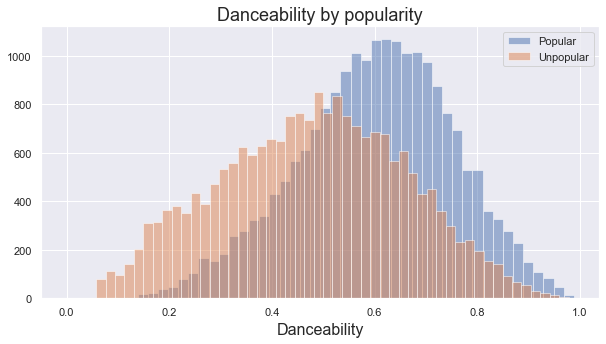

In [361]:
# Plot danceability by popularity
plt.figure(figsize=(10,5))
plt.hist(popular['danceability'], alpha=.5, bins=50, label='Popular')
plt.hist(unpopular['danceability'], alpha=.5, bins=50, label='Unpopular')

plt.xlabel('Danceability', size=16)
plt.title('Danceability by popularity', size=18)
plt.legend(loc='best')

plt.show();

Both distributions seem to be close to normally distributed by a visual inspection. Let's calculate some statistics and test for normality using the Shapiro-Wilk test. Although the p-value may not be accurate for samples larger than 5000, the test statistics should be accurate and help us provide some indications. 

In [362]:
# Calculate skewness and kurtosis
print(stats.describe(popular['danceability']))
print(stats.describe(unpopular['danceability']), '\n')

# Test for normality
print(stats.shapiro(popular['danceability']))
print(stats.shapiro(unpopular['danceability']))

DescribeResult(nobs=20548, minmax=(0.0, 0.988), mean=0.6012118357017714, variance=0.02295889458127986, skewness=-0.2524126963655955, kurtosis=-0.21990301465001094)
DescribeResult(nobs=20551, minmax=(0.0576, 0.978), mean=0.47816293124422166, variance=0.03270260210418598, skewness=-0.025951179048799358, kurtosis=-0.5963915009919534) 

ShapiroResult(statistic=0.994170069694519, pvalue=1.1722831274553891e-27)
ShapiroResult(statistic=0.992752730846405, pvalue=1.5046010777248298e-30)


/opt/anaconda3/envs/large-datasets/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Both skewness and kurtosis are well below the threshold of ±3 for normality, while the test statistics is very close to 1. Great! We can more forward with an independet t-test.

**State the null and alternative hypothesis**

- The *null* hypothesis is that there is *no* significant difference in dancability, on average, between popular and unpopular songs.
- The *alternative* hypothesis is that there *is* a significant difference in dancability, on average, between popular and unpopular songs.


#### Test the *null* hypothesis

In [363]:
# Conduct the t-test
stats.ttest_ind(popular['danceability'],
                unpopular['danceability'])

Ttest_indResult(statistic=74.76497030046097, pvalue=0.0)

The p-value is very low. We can thus go with a 99% confidence level when calculating the confidence interval. Define a function for this purpose.  

In [364]:
def get_ci(array_1, array_2, cl=0.95):
    """ Function for calculating the difference in means between two distributions.
        cl is confidence level. Deafult is 95%
    """
    
    # Get z score depending on the confidence level
    if cl == 0.90:
        z = 1.645
    elif cl == 0.95:
        z = 1.96
    elif cl == 0.99:
        z = 2.58
    else:
        raise Exception("Specify an adequate confidence level (0.90, 0.95 or 0.99)")
    
    # Calculate Margin of Error
    MOE = z * math.sqrt((array_1.var()/len(array_1))+(array_2.var()/len(array_2)))
    
    # Lower and Upper confidence intervals
    mean1 = array_1.mean()
    mean2 = array_2.mean()
    mean_diff = mean2 - mean1
    ci_lower = mean_diff - MOE
    ci_upper = mean_diff + MOE
    
    print("The difference in means at the {:.0%} confidence level (two-tail) is between {:.3f} and {:.3f}.".format(
        cl, ci_lower, ci_upper))
    print(f"\nMeans:\n{mean1:.5f}\n{mean2:.5f}")

In [365]:
# Calculate confidence interval and means
get_ci(popular['danceability'], unpopular['danceability'], cl=0.99)

The difference in means at the 99% confidence level (two-tail) is between -0.127 and -0.119.

Means:
0.60121
0.47816


*We can reject the null. With 99% confidence, popular songs have on average between 0.12 and 0.13 higher danceability scores than unpopular songs.* Due to the [0-1] scale, it can be interpreted as a difference of around 12-13%. 


#### Visualise the difference in danceability

It can be difficult to imagine this average difference just looking at the numbers. Below plot makes this slightly clearer.

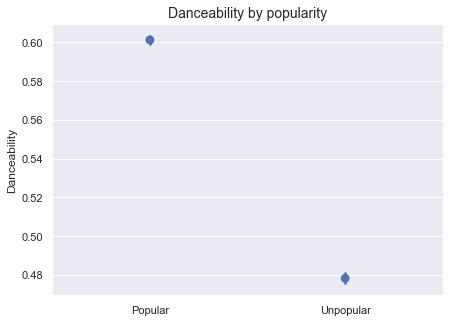

In [366]:
plt.figure(figsize=(7, 5))
p = sns.pointplot(data=[popular['danceability'], 
                        unpopular['danceability']],
                 join=False)
p.set(xticklabels=['Popular', 'Unpopular'])
p.set(ylabel='Danceability')
plt.title('Danceability by popularity', size=14);

Here we can visually see that the average danseability for popular songs is significantly higher (at 0.60) compared with unpopular (0.48) songs. Note the small confidence intervals (vertical lines through the dots which you barely see) - they're a result of the large sample size which allows us to calculate the difference more accurately. 


<br><br>

<a name="energy"></a>


## [Energy](#top)


Are energetic, fast and intense songs more popular than those that are less energetic?

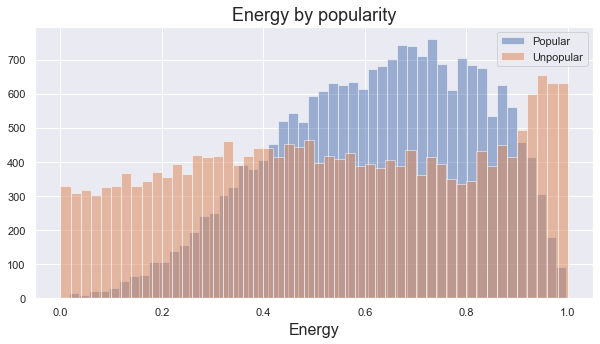

DescribeResult(nobs=20548, minmax=(0.0181, 0.997), mean=0.6242916488222697, variance=0.03940703746274093, skewness=-0.3484507320013295, kurtosis=-0.5913161577042674)
DescribeResult(nobs=20551, minmax=(0.000251, 1.0), mean=0.5348029597586493, variance=0.08423108898177896, skewness=-0.0645874449705946, kurtosis=-1.1823820620299565) 

ShapiroResult(statistic=0.97867751121521, pvalue=0.0)
ShapiroResult(statistic=0.9531692266464233, pvalue=0.0)


In [367]:
# Plot energy by popularity
plt.figure(figsize=(10,5))
plt.hist(popular['energy'], alpha=.5, bins=50, label='Popular')
plt.hist(unpopular['energy'], alpha=.5, bins=50, label='Unpopular')

plt.xlabel('Energy', size=16)
plt.title('Energy by popularity', size=18)
plt.legend(loc='best')
plt.show();

# Calculate skewness and kurtosis
print(stats.describe(popular['energy']))
print(stats.describe(unpopular['energy']), '\n')

# Test for normality
print(stats.shapiro(popular['energy']))
print(stats.shapiro(unpopular['energy']))


A visual inspection seem to indicate that the most energetic songs are unpopular (energy level at or close to 1). Popular songs are still clustered in the higher end with most energetic songs scoring around 0.5 and 0.8. Popular songs are fairly normally distributed, while unpopular are not.

Although skewness and kurtosis indicate that both distributions are normal, the unpopular songs visuals are not convincing. We will thus go with a non-parametric test to be on the safe side. The sample size is with good margin large enough. 

<br>

**State the null and alternative hypothesis**

- The *null* hypothesis is that there is *no* significant difference, on average, in energy level between popular and unpopular songs. 
- The *alternative* hypothesis is that there *is* a significant difference, on average, in energy level between popular and unpopular songs. 


#### Test the *null* hypothesis

In [368]:
# Run t-test
stats.kruskal(popular['energy'],
              unpopular['energy'])

KruskalResult(statistic=904.2689008936939, pvalue=1.15828492943128e-198)

In [369]:
# Calculate confidence interval. We use a 99% confidence level du to the very low p-value
get_ci(popular['energy'], unpopular['energy'], cl=.99)

The difference in means at the 99% confidence level (two-tail) is between -0.096 and -0.083.

Means:
0.62429
0.53480


*We reject the null. With 99% confidence, popular songs have on average between 0.08 and 0.1 higher energy level than unpopular songs.* A difference of 8-10% on average. 


#### Visualise the difference in energy level

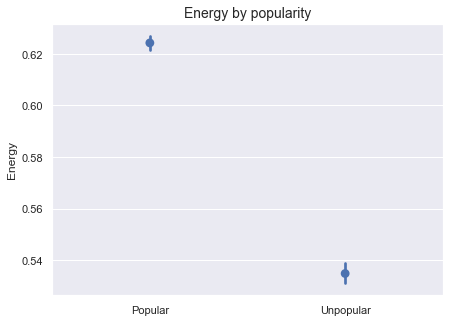

In [370]:
plt.figure(figsize=(7, 5))
p = sns.pointplot(data=[popular['energy'], 
                        unpopular['energy']],
                 join=False)
p.set(xticklabels=['Popular', 'Unpopular'])
p.set(ylabel='Energy')
plt.title('Energy by popularity', size=14);

Above pointplot visually displays how the average energy level for popular songs (0.62) is significanlty higher than for unpopular songs (0.53). 

<br><br>

<a name="speechiness"></a>


## [Speechiness](#top)


Does more or less speech in a song affect its popularity? The more speech-like the song, the closer the value is to 1.0. 

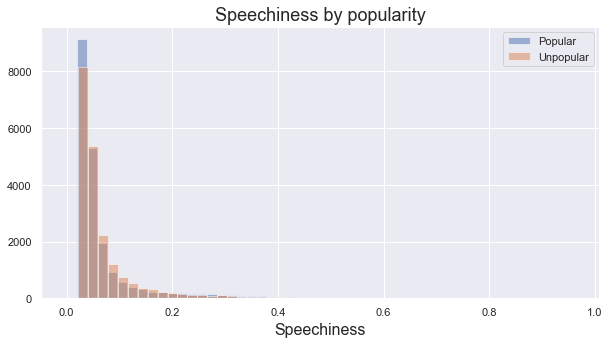

DescribeResult(nobs=20548, minmax=(0.0, 0.95), mean=0.06942718512750633, variance=0.005906813763293316, skewness=3.2974065853613164, kurtosis=13.700040400575247)
DescribeResult(nobs=20551, minmax=(0.0223, 0.96), mean=0.07647677485280521, variance=0.008897069031855826, skewness=5.1384851470838315, kurtosis=34.92671700665262) 

ShapiroResult(statistic=0.5644060373306274, pvalue=0.0)
ShapiroResult(statistic=0.47629427909851074, pvalue=0.0)


In [371]:
# Plot speechiness by popularity
plt.figure(figsize=(10,5))
plt.hist(popular['speechiness'], alpha=.5, bins=50, label='Popular')
plt.hist(unpopular['speechiness'], alpha=.5, bins=50, label='Unpopular')

plt.xlabel('Speechiness', size=16)
plt.title('Speechiness by popularity', size=18)
plt.legend(loc='best')
plt.show();

# Calculate skewness and kurtosis
print(stats.describe(popular['speechiness']))
print(stats.describe(unpopular['speechiness']), '\n')

# Test for normality
print(stats.shapiro(popular['speechiness']))
print(stats.shapiro(unpopular['speechiness']))


There is no clear visual difference between popular and unpopular songs. They all make up of little speech. It seems like speech-rich content such as audio books and podcasts have been excluded from the dataset during data collection.

None of the distributions seem normal by a visual inspection, and both skewness and kurtosis indicate the same. We will thus use Kruskal-Wallis test to test the null hypothesis. 


**State the null and alternative hypothesis**

- The *null* hypothesis is that there is *no* significant difference, on average, in speechiness between popular and unpopular songs. 
- The *alternative* hypothesis is that there *is* a significant difference, on average, in speechiness between popular and unpopular songs. 


#### Test the *null* hypothesis

In [372]:
# Test the null
stats.kruskal(popular['speechiness'],
              unpopular['speechiness'])

KruskalResult(statistic=697.3928255038659, pvalue=1.1031965192407093e-153)

Due to the very low p-value, we can use a confidence level of 99%. 

In [373]:
# Calculate confidence interval
get_ci(popular['speechiness'], unpopular['speechiness'], cl=0.99)

The difference in means at the 99% confidence level (two-tail) is between 0.005 and 0.009.

Means:
0.06943
0.07648


We reject the null. With 99% confidence, popular songs have on average between 0.005 and 0.009 lower speechiness score compared with unpopular songs. *However, although significant, the difference is so small that it may not have any real importance.* It's less than 1%. 

#### Visualise the difference in speechiness

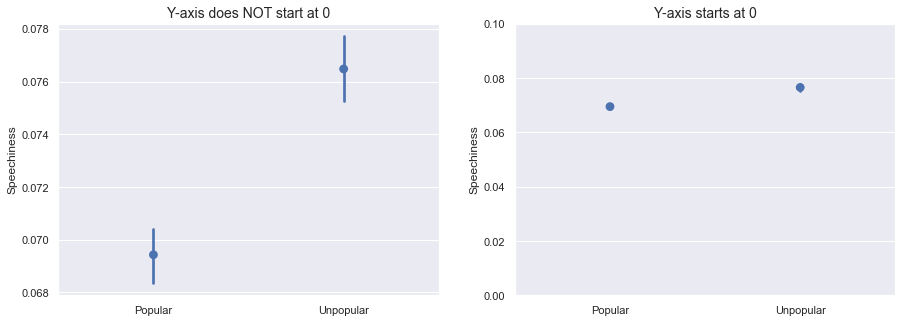

In [374]:
plt.figure(figsize=(15, 5))

# Display plot with truncated y-axis (which doesn't start at 0)
plt.subplot(1, 2, 1)
p = sns.pointplot(data=[popular['speechiness'], 
                        unpopular['speechiness']],
                  join=False)
p.set(xticklabels=['Popular', 'Unpopular'])
p.set(ylabel='Speechiness')
plt.title('Y-axis does NOT start at 0', size=14);

# Display plot with y-axis starting at 0
plt.subplot(1, 2, 2)
q = sns.pointplot(data=[popular['speechiness'], 
                        unpopular['speechiness']],
                  join=False)
q.set(xticklabels=['Popular', 'Unpopular'])
q.set(ylabel='Speechiness')
plt.title('Y-axis starts at 0', size=14);
plt.ylim(ymin=0, ymax=.1);

The left plot, which is using the default settings and a truncated y-axis, indicate a very large difference between the two distributions. The right plot, with a y-axis starting at 0, doesn't play tricks on us like that. It's important to be wary of these details when plotting the difference between two groups. The statistical test suggested a very small difference - and this should be reflected in the visuals as well. 

The two means are 0.069 for popular songs and 0.076 for unpopular. 


<br><br>

<a name="instrumentalness"></a>


## [Instrumentalness](#top)

Does instrumentalness differ between popular and unpopular songs? My initial guess is that popular songs are less instrumental (and thus more vocal). Why? Well, my impression is that most songs that play on radio are vocal rather than instrumental. Let's test whether this holds true. 

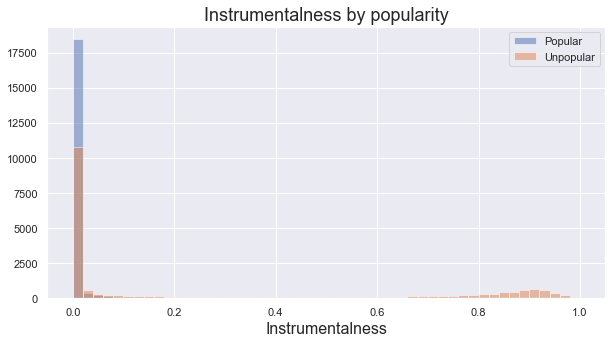

DescribeResult(nobs=20548, minmax=(0.0, 0.982), mean=0.03069373979560055, variance=0.016857409891644796, skewness=5.196960615518452, kurtosis=27.571067970038175)
DescribeResult(nobs=20551, minmax=(0.0, 1.0), mean=0.27809455669359157, variance=0.13677959632311393, skewness=0.824903938676398, kurtosis=-1.1009584684730493) 

ShapiroResult(statistic=0.25121474266052246, pvalue=0.0)
ShapiroResult(statistic=0.7122498750686646, pvalue=0.0)


In [375]:
# Plot instrumentalness by popularity
plt.figure(figsize=(10,5))
plt.hist(popular['instrumentalness'], alpha=.5, bins=50, label='Popular')
plt.hist(unpopular['instrumentalness'], alpha=.5, bins=50, label='Unpopular')

plt.xlabel('Instrumentalness', size=16)
plt.title('Instrumentalness by popularity', size=18)
plt.legend(loc='best')
plt.show();

# Calculate skewness and kurtosis
print(stats.describe(popular['instrumentalness']))
print(stats.describe(unpopular['instrumentalness']), '\n')

# Test for normality
print(stats.shapiro(popular['instrumentalness']))
print(stats.shapiro(unpopular['instrumentalness']))

None of these distributions are normal. Kruskal-Wallis test will do for testing the null hypothesis. 


**State the null and alternative hypothesis**

- The *null* hypothesis is that there is *no* significant difference, on average, in instrumentalness between popular and unpopular songs. 
- The *alternative* hypothesis is that there *is* a significant difference, on average, in instrumentalness between popular and unpopular songs. 


#### Test the *null* hypothesis

In [376]:
# Test the null
stats.kruskal(popular['instrumentalness'],
              unpopular['instrumentalness'])

KruskalResult(statistic=7265.829685757234, pvalue=0.0)

We can choose a confidence level of 99% for the confidence interval due to the low p-value. The high t-statistics indicate a large difference between the groups. 

In [377]:
# Calculate confidence interval
get_ci(popular['instrumentalness'], unpopular['instrumentalness'], cl=0.99)

The difference in means at the 99% confidence level (two-tail) is between 0.240 and 0.254.

Means:
0.03069
0.27809


We reject the null. There is a significant difference in mean between the two groups. *With 99% confidence, popular songs have between 0.24 and 0.25 points lower instrumentalness than unpopular songs*. My initial guess was right then. 


#### Visualise the difference in instrumentalness

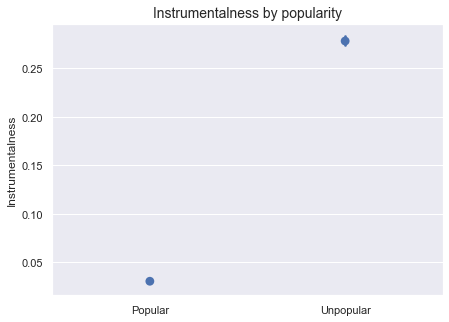

In [379]:
plt.figure(figsize=(7, 5))
p = sns.pointplot(data=[popular['instrumentalness'], 
                        unpopular['instrumentalness']],
                 join=False)
p.set(xticklabels=['Popular', 'Unpopular'])
plt.ylabel('Instrumentalness')
plt.title('Instrumentalness by popularity', size=14);

Visually the difference is clear, with means at around 0.03 and 0.28. Popular songs are on average far less instrumental than those that are unpopular. 


<br><br>


<a name="duration"></a>


## [Duration](#top)


Are longer songs perhaps less popular? 

Start by plotting the duration distribution, split by popularity. As the right tail is very long (the longest song is around 70 minutes, or over 4000 seconds), we can cut the x-axis short at 1000 seconds to help with interpretation.  

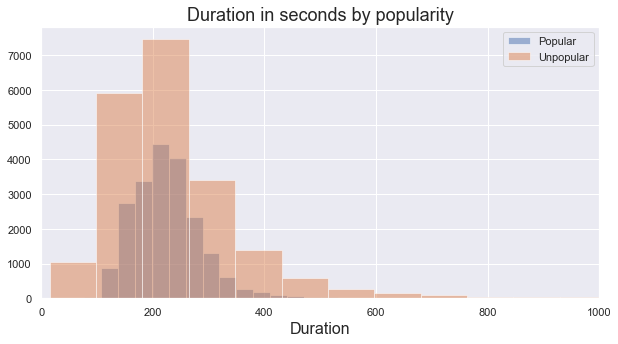

DescribeResult(nobs=20548, minmax=(46.893, 1561.133), mean=226.09435414638892, variance=4327.174919910735, skewness=2.231968165242757, kurtosis=21.221058623337363)
DescribeResult(nobs=20551, minmax=(15.168, 4170.227), mean=243.65537423969636, variance=23825.402318643053, skewness=5.933831818977015, kurtosis=83.22764209773909) 

ShapiroResult(statistic=0.8957380056381226, pvalue=0.0)
ShapiroResult(statistic=0.6636985540390015, pvalue=0.0)


In [380]:
# Plot duration by popularity
plt.figure(figsize=(10,5))
plt.hist(popular['duration'], alpha=.5, bins=50, label='Popular')
plt.hist(unpopular['duration'], alpha=.5, bins=50, label='Unpopular')

plt.xlabel('Duration', size=16)
plt.xlim(xmin=0, xmax=1000)
plt.title('Duration in seconds by popularity', size=18)
plt.legend(loc='best')
plt.show();

# Calculate skewness and kurtosis
print(stats.describe(popular['duration']))
print(stats.describe(unpopular['duration']), '\n')

# Test for normality
print(stats.shapiro(popular['duration']))
print(stats.shapiro(unpopular['duration']))

Both skewness, kurtosis and a visual inspection indicate that neither of the distributions are normal. 


**State the null and alternative hypothesis**

- The *null* hypothesis is that there is *no* significant difference in mean song duration between popular and unpopular songs.  
- The *alternative* hypothesis is that there *is* a significant difference in mean song duration between popular and unpopular songs.  

Use the Kruskal-Wallis test to test the null.

#### Test the *null* hypothesis

In [381]:
# Test the null
stats.kruskal(popular['duration'],
              unpopular['duration'])

KruskalResult(statistic=18.9782431636515, pvalue=1.3221751844007864e-05)

In [382]:
# Calculate confidence interval with a 99% confidence level
get_ci(popular['duration'], unpopular['duration'], cl=0.99)

The difference in means at the 99% confidence level (two-tail) is between 14.541 and 20.581.

Means:
226.09435
243.65537


We reject the null. There is a significant difference in duration between popular and unpopular songs. *With 99% confidence, popular songs are on average between 15 and 21 seconds shorter than unpopular songs.* 

I find this reasonable. Bombarded with information and distractions, there's little time a song has to get us hooked. Let's visually display this difference below. 


#### Visualise the difference in duration

A plot helps us visually understand the difference in means. The average duration for popular songs is 226 seconds (less than 4 minutes) while 244 for unpopular. 

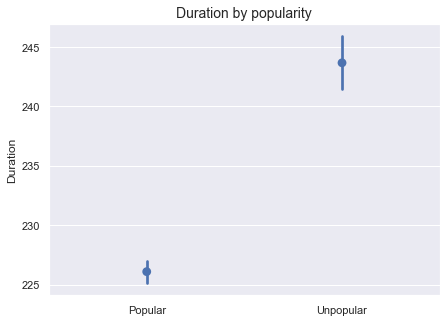

In [383]:
plt.figure(figsize=(7, 5))
p = sns.pointplot(data=[popular['duration'], 
                        unpopular['duration']],
                 join=False)
p.set(xticklabels=['Popular', 'Unpopular'])
plt.ylabel('Duration')
plt.title('Duration by popularity', size=14);


<br><br><br>
<br><br><br>


<a name="conclusions"></a>


## [Conclusions](#top)


We've identified several attributes that differ between popular and unpopular songs. With high certainty, *Danceability*, *Energy* level, *Instrumentalness* and *Duration* are significantly different between the two groups. Although the difference in *Speechiness* was statistically significant (probably due to the large sample size), it's so small that it's probably negligible. 

It's also important to point out that we've only looked into some few features in the dataset. Chances are that there are more features that differ between popular and unpopular songs - some may even play a bigger role in distinguishing between the two groups. Common approaches for this are creating a correlation matrix or, if you're taking a machine learning approach, feature importance. 

There are several caveats regarding the dataset as well. We don't know under what assumptions it was collected or whether it's representative for songs in general. It contains roughly as many popular as unpopular songs (20,000) while it's fair to assume that there are more unpopular than popular songs on the market. We don't know exactly what defines a song as popular. Perhaps the definition is too loose or too restricted. 

Nevertheless, if you feel that most of the songs you're listening to are more *danceable* than not, have high *energy* levels, are most often not *instrumental* and are less than 4 minutes long - then there's a chance your music would be popular among many others. On the other hand, if you don't recognise yourself listening to that kind of music, you might be more unique. 🙂